In [1]:
%matplotlib inline
import pandas 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
thermal = pandas.read_csv('/Users/alex/Documents/bglb_thermal/data_set/master_sheet.csv')
thermal['mutant_name'] = thermal.mutant
thermal.set_index('mutant_name', inplace=True)
thermal = thermal[(thermal.expression == 0)]
thermal.head()

,mutant,sequence_pos,expression,tm,k,err_tm,err_k,kcat,km,kcatkm,err_km,err_kcat,err_kcatkm,ki,ki_percent_err,ki_err,gel_number
mutant_name,,,,,,,,,,,,,,,,,
G12N,G12N,12.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0
S16N,S16N,16.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
Q19P,Q19P,19.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0
S32L,S32L,32.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
W34A,W34A,34.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0


In [3]:
df = pandas.read_csv('../data_sets/bglb_data_set.csv', index_col=0)
df.set_index('mutant_name', inplace=True)
df['expression'] = 1
df.head()

,kcat,km,kcatkm,expression
mutant_name,,,,
S14A,320.0,8.25,38823.0,1
T15A,614.0,5.30,115849.0,1
S16A,154.0,14.01,10997.0,1
S17A,848.0,18.45,45978.0,1
S17E,641.0,7.32,87596.0,1


In [4]:
df.shape

(111, 4)

In [5]:
#new = [n for n in df.index if n not in thermal.index]

In [6]:
thermal[df.columns].shape

(37, 4)

In [7]:
result = df.append(thermal[df.columns])
result.kcat = np.log10(result.kcat/880.0)
result.km = np.log10(result.km/5.0)
result.kcatkm = np.log10(result.kcatkm/174000.0)
result.sample(5)

,kcat,km,kcatkm,expression
mutant_name,,,,
BglB,0.000000,0.000000,0.000000,1
F415A,-2.944483,0.521922,-3.337459,1
E426S,-0.138371,-0.086186,-0.047221,1
W120A,NaN,NaN,NaN,0
E177S,-0.074079,-0.055517,-0.013598,1


In [8]:
result.loc[['BglB']]

,kcat,km,kcatkm,expression
mutant_name,,,,
BglB,0.0,0.0,0.0,1


In [9]:
#result.to_csv('../data_sets/speculative_targets.csv')

In [10]:
df = result.copy()
dropme = 'E353E X123Y BglB'.split()
df = df.drop(dropme)
df['pos'] = df.index.map(lambda x: int(x[1:-1])) 
df['native'] = df.index.str[0]
df['design'] = df.index.str[-1]
df.sample(5)

,kcat,km,kcatkm,expression,pos,native,design
mutant_name,,,,,,,
S16N,NaN,NaN,NaN,0,16,S,N
W325L,-0.907056,0.059942,-0.963881,1,325,W,L
T352A,-1.166331,0.455150,-1.619997,1,352,T,A
Q313R,-0.106263,-0.145087,0.043595,1,313,Q,R
S32L,NaN,NaN,NaN,0,32,S,L


In [11]:
all_20_aa = sorted(df.native.unique())

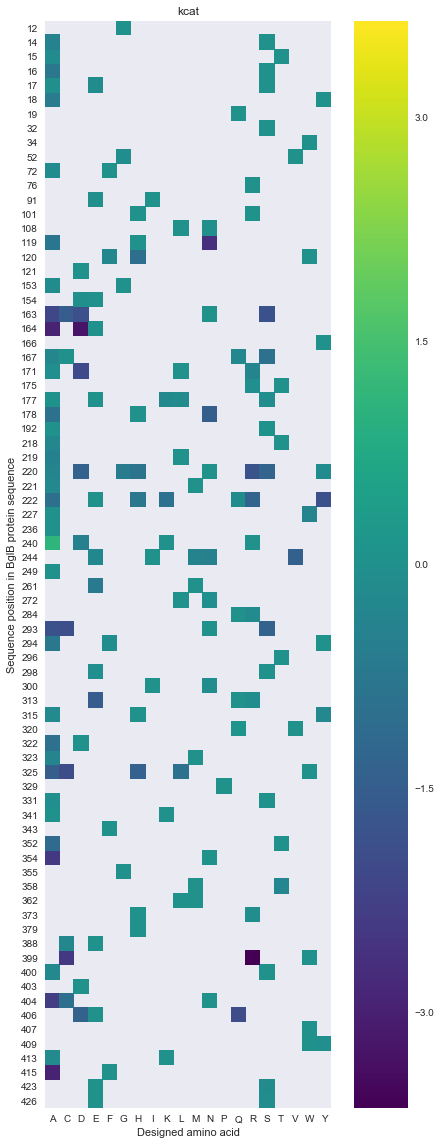

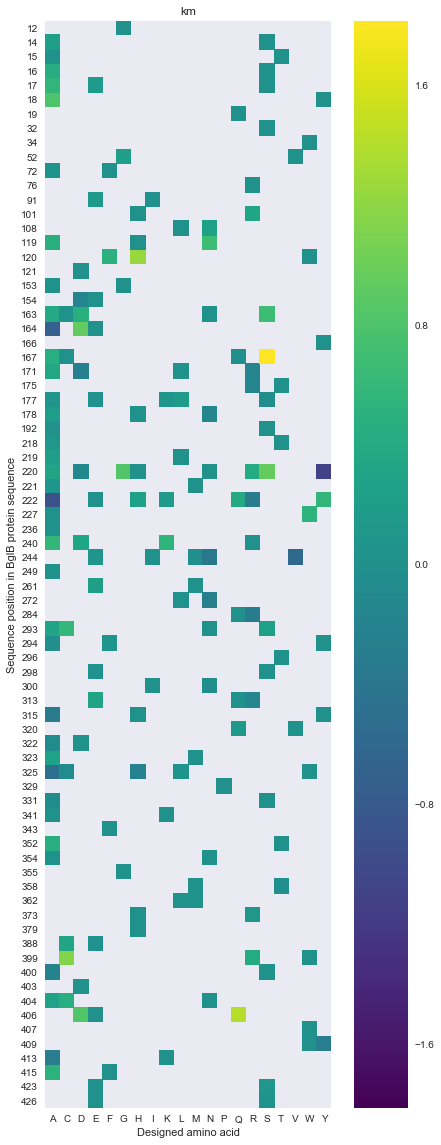

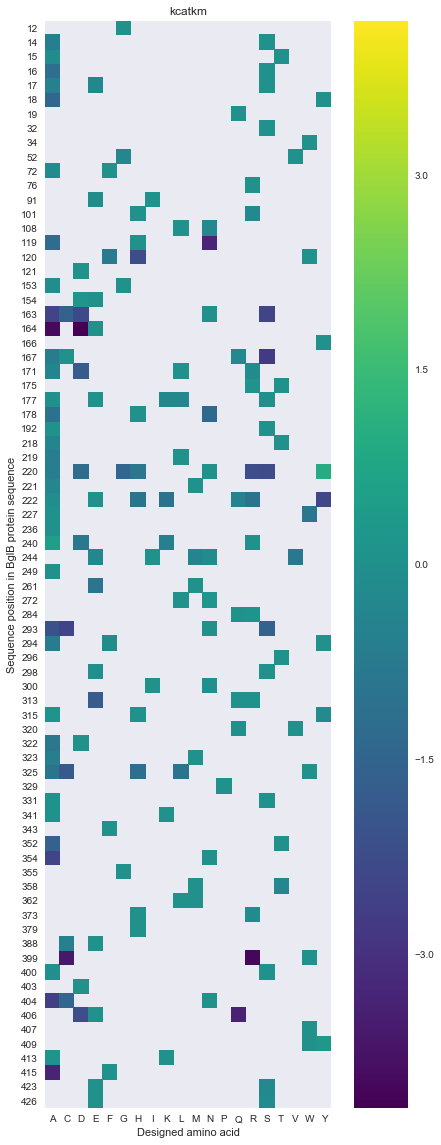

In [12]:
for target in 'kcat km kcatkm'.split():
    J = pandas.DataFrame(None, index=sorted(df.pos.unique()), columns=sorted(df.native.unique()), dtype='float64')
    for idx, series in df.iterrows():
        J.loc[series.pos, series.design] = series[target]
        J.loc[series.pos, series.native] = 0 
    mask = J.isnull()
    fig, ax = plt.subplots(1, 1, figsize=(8,20))
    sns.heatmap(J, mask=mask, square=1, ax=ax, cmap='viridis')
    ax.set_title(target)
    ax.set_ylabel('Sequence position in BglB protein sequence')
    ax.set_xlabel('Designed amino acid')
    fig.savefig('img/heatmap_{}.png'.format(target))

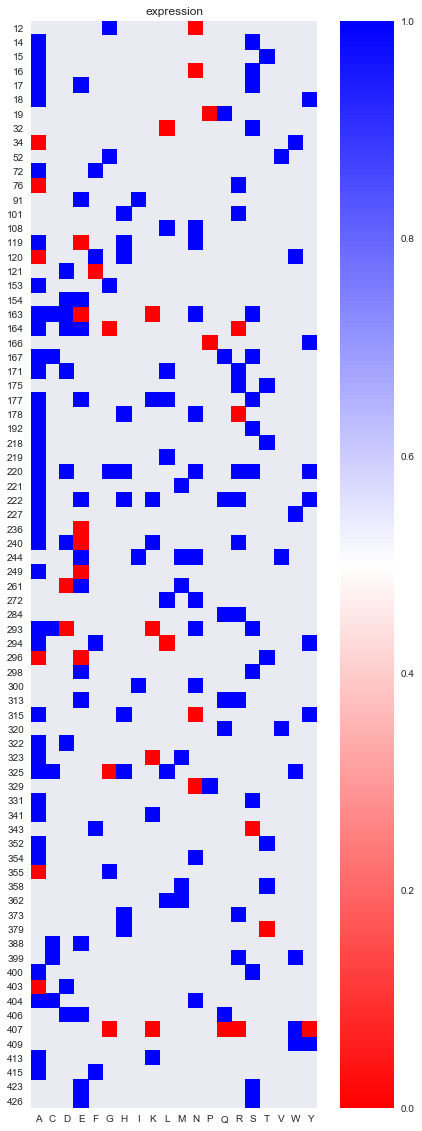

In [13]:
for target in ['expression']:
    J = pandas.DataFrame(None, index=sorted(df.pos.unique()), columns=sorted(df.native.unique()), dtype='float64')
    for idx, series in df.iterrows():
        J.loc[series.pos, series.design] = series[target]
        J.loc[series.pos, series.native] = 1
    mask = J.isnull()
    
    fig, ax = plt.subplots(1, 1, figsize=(8,20))
    ax.set_title(target)
    ax.set_ylabel('Sequence position in BglB protein sequence')
    ax.set_xlabel('Designed amino acid')
    sns.heatmap(J, mask=mask, square=1, ax=ax, cmap='bwr_r')
    fig.savefig('img/heatmap_{}.png'.format(target))

In [14]:
J.shape

(76, 20)

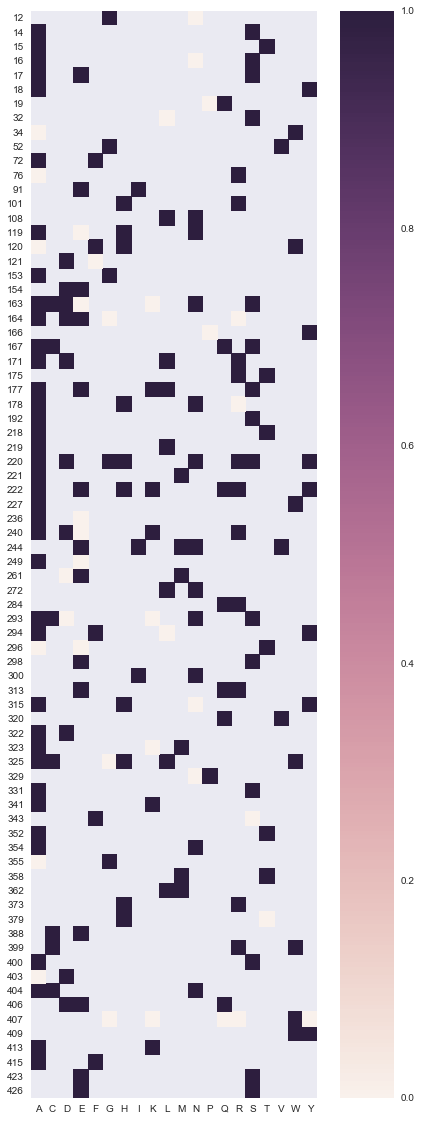

In [15]:
mask = J.isnull()
plt.figure(figsize=(8,20))
sns.heatmap(J, mask=mask, square=1)

In [16]:
# # 2D sequence-functional slices 


# for wanted in wanted_pos:
#     fig, ax = plt.subplots()
#     ax.scatter(
# # for target in 'kcat km kcatkm'.split():
# #     J = pandas.DataFrame(None, index=sorted(df.pos.unique()), columns=sorted(df.native.unique()), dtype='float64')
# #     for idx, series in df.iterrows():
# #         J.loc[series.pos, series.design] = series[target]
# #         J.loc[series.pos, series.native] = 0 
# #     mask = J.isnull()
# #     fig, ax = plt.subplots(1, 1, figsize=(8,20))
# #     sns.heatmap(J, mask=mask, square=1, ax=ax, cmap='viridis')
# #     ax.set_title(target)
# #     ax.set_ylabel('Sequence position in BglB protein sequence')
# #     ax.set_xlabel('Designed amino acid')
# #     fig.savefig('img/heatmap_{}.png'.format(target))

In [17]:
df.head()

,kcat,km,kcatkm,expression,pos,native,design
mutant_name,,,,,,,
S14A,-0.439333,0.217484,-0.651460,1,14,S,A
T15A,-0.156314,0.025306,-0.176657,1,15,T,A
S16A,-0.756962,0.447468,-1.199275,1,16,S,A
S17A,-0.016087,0.567026,-0.577999,1,17,S,A
S17E,-0.137625,0.165541,-0.298065,1,17,S,E


In [18]:
def enrich_with_wt(df):
    seen = []
    for mutant_name, row in df.iterrows():
        if mutant_name not in seen:
            name = '{}{}{}'.format(row.native, row.pos, row.native)
            pkg = (0, 0, 0, 1, row.pos, row.native, row.native)
            df.loc[name] = pkg 
            seen.append(mutant_name) 
    return df 

df = enrich_with_wt(df)

def enrich_with_missing(df):
    seen = []
    for mutant_name, row in df.iterrows():
        if mutant_name not in seen:
            seen.append(mutant_name)
            for residue in df.native.unique():              
                name = '{}{}{}'.format(row.native, row.pos, residue)
                if name not in df.index:
                    pkg = (np.nan, np.nan, np.nan, np.nan, row.pos, row.native, residue)
                    df.loc[name] = pkg 
                     
    return df 

df = enrich_with_missing(df)

In [19]:
df.shape

(1525, 7)

In [20]:
df.head()

,kcat,km,kcatkm,expression,pos,native,design
mutant_name,,,,,,,
S14A,-0.439333,0.217484,-0.651460,1.0,14,S,A
T15A,-0.156314,0.025306,-0.176657,1.0,15,T,A
S16A,-0.756962,0.447468,-1.199275,1.0,16,S,A
S17A,-0.016087,0.567026,-0.577999,1.0,17,S,A
S17E,-0.137625,0.165541,-0.298065,1.0,17,S,E


In [21]:
wanted_pos = list(df.groupby('pos').apply(lambda x: len(x)).sort_values().tail(11).index)
wanted_index = [idx for idx, _ in df.iterrows() if _.pos in wanted_pos]

In [22]:
len(wanted_index)

225

In [23]:
# # bg_dat = 
# bg = pandas.DataFrame(bg_dat)

/Users/alex/anaconda3/lib/python3.6/site-packages/pandas/tools/plotting.py:2470: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


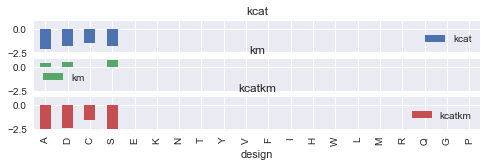

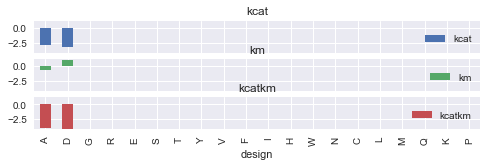

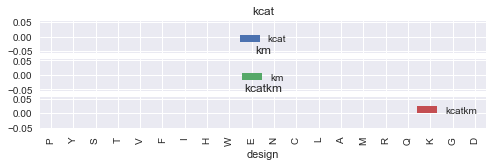

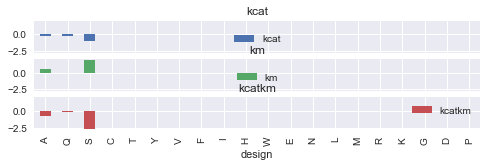

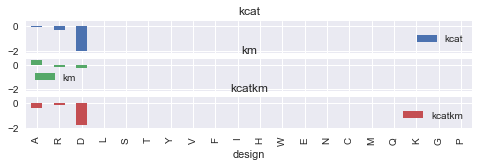

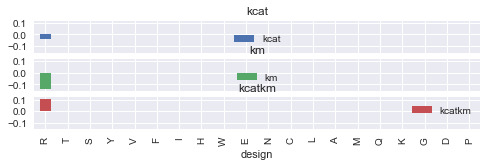

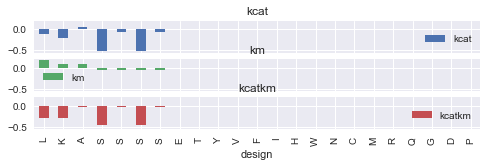

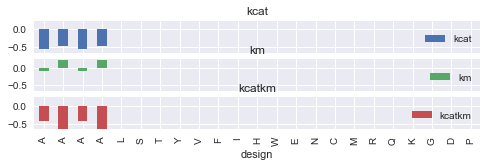

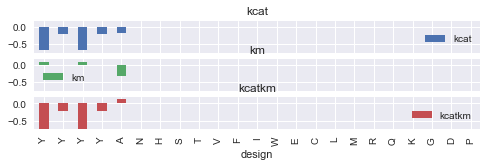

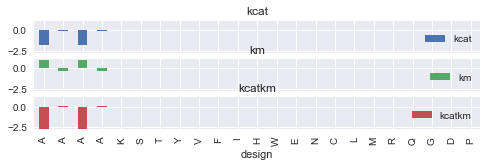

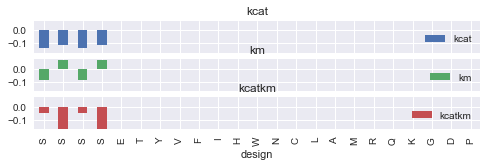

In [34]:
for index, data in df.loc[wanted_index].groupby('pos'):
    fig, ax = plt.subplots(figsize=(8,2))
    data.plot(subplots=1, x='design', y=['kcat', 'km', 'kcatkm'], kind='bar', ax=ax, sharex=1, sharey=1)
    ax.set_xticks(range(20))
    ax.set_ylim(df.kcat.min(), df.kcat.max())
    ax.set(xlabel='', ylabel='Fitness, position {}'.format(index))

In [25]:
sorted(df.design.unique())

['A',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'K',
 'L',
 'M',
 'N',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'V',
 'W',
 'Y']

In [26]:
uniq_pos = df.pos.unique()
len(uniq_pos)

76

In [27]:
len(result.index.unique())

142

In [28]:
len(result.index)

148

In [29]:
result.index.drop_duplicates

<bound method Index.drop_duplicates of Index(['S14A', 'T15A', 'S16A', 'S17A', 'S17E', 'Y18A', 'V52G', 'F72A', 'I91E',
       'H101R',
       ...
       'P329N', 'F343S', 'G355A', 'H379T', 'D403A', 'W407G', 'W407K', 'W407Q',
       'W407R', 'W407Y'],
      dtype='object', name='mutant_name', length=148)>

In [30]:
! pwd 

/Users/alex/Documents/bglb_family/visuals


In [31]:
! ls ../

README.md               full_auto               shallow_mutational_scan
alignments              machine_learning        trees
data_sets               pipeline                visuals
features_reporter       pyrosetta_runs
freezer_tree            rosetta_runs


In [32]:
df.

SyntaxError: invalid syntax (<ipython-input-32-d230d845cd15>, line 1)